# Estimating a continuous variable from a near-infrared spectra

In this example data set we aim to predict a continous variable. This is the case for instance in the food industry, where one wants to predict nutrient content.



## Data exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("./data/nir.csv", header=None, index_col=0, sep=";")

In [3]:
df.head(10)

,1,2,3,4,5,6,7,8,9,10,...,672,673,674,675,676,677,678,679,680,681
0,,,,,,,,,,,,,,,,,,,,,
1,12.740000,0.597482,0.595978,0.593623,0.590840,0.587451,0.583092,0.578666,0.572134,0.566125,...,0.119548,0.118791,0.118170,0.117522,0.116919,0.116422,0.115861,0.115367,0.114876,0.114548
2,35.721199,0.954192,0.953237,0.952002,0.950426,0.948382,0.946138,0.943543,0.940570,0.937514,...,0.287561,0.285157,0.282881,0.280734,0.278929,0.277288,0.275735,0.274133,0.272768,0.271574
3,12.000000,0.611137,0.609566,0.607430,0.604767,0.601434,0.597316,0.592598,0.586992,0.580741,...,0.116174,0.115513,0.114890,0.114354,0.113720,0.113223,0.112702,0.112212,0.111764,0.111432
4,13.844976,0.342604,0.343687,0.344696,0.345664,0.346574,0.347402,0.348187,0.348870,0.349470,...,0.084568,0.084324,0.084156,0.084029,0.083939,0.083858,0.083770,0.083700,0.083641,0.083626
5,19.299999,0.760703,0.760871,0.761004,0.761058,0.761009,0.760830,0.760615,0.760404,0.760069,...,0.309897,0.307698,0.305618,0.303555,0.301619,0.299720,0.297918,0.296330,0.294762,0.293355
6,7.619196,1.030475,1.028552,1.026215,1.023312,1.019820,1.015712,1.010988,1.005641,0.999669,...,0.212103,0.211988,0.211985,0.212118,0.212253,0.212366,0.212520,0.212720,0.212965,0.213222
7,24.332531,1.043301,1.042196,1.040849,1.039130,1.037030,1.034543,1.031686,1.028533,1.025166,...,0.247601,0.245244,0.243070,0.241018,0.239089,0.237248,0.235469,0.233783,0.232188,0.230715
8,36.571758,0.920085,0.919237,0.918164,0.916782,0.915112,0.913146,0.910897,0.908407,0.905766,...,0.333014,0.330957,0.329072,0.327309,0.325689,0.324237,0.322888,0.321700,0.320748,0.319868
9,55.902779,0.740965,0.739985,0.738664,0.737132,0.735201,0.732822,0.730385,0.727357,0.724210,...,0.159469,0.158417,0.157381,0.156452,0.155575,0.154856,0.154160,0.153571,0.153044,0.152560


In [4]:
df.shape

(3908, 681)

We have much more data now, so we will not do feature selection.

In [5]:
df.columns = ['target']+[i for i in range(1,681)]

In [6]:
from ipywidgets import interact

In [7]:
ymin=df.iloc[:,1:].min().min()
ymax=df.iloc[:,1:].max().max()

In [8]:
ymax

1.177985108

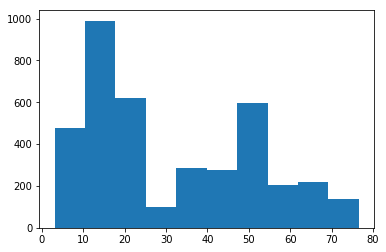

In [9]:
plt.hist(df.iloc[:,0]);

In [10]:
def choose_spectra(val):
    tol = 0.5
    ix=np.where((df.iloc[:,0]>=val-tol) & (df.iloc[:,0]<=val+tol) )[0][0]
    plt.figure(figsize=(10,10))
    plt.plot(df.iloc[ix,1:])
    plt.ylim(ymin,ymax)
    plt.show()

In [11]:
minval=df.iloc[:,0].min()
maxval=df.iloc[:,0].max()

In [12]:
interact(choose_spectra, val=(minval,maxval));

interactive(children=(FloatSlider(value=39.83231235, description='val', max=76.603981, min=3.0606437), Output(…

## Baseline model

We will use linear regression as a baseline model

In [13]:
X_train=df.iloc[:,1:].values
y_train=df.iloc[:,0].values

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.9962028042577138

In [16]:
y_pred=lr.predict(X_train)

In [17]:
grid=np.linspace(0,80)

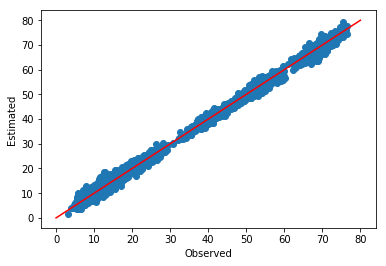

In [18]:
plt.scatter(y_train,y_pred)
plt.xlabel("Observed")
plt.ylabel("Estimated")
plt.plot(grid,grid, c='red')

In [19]:
from sklearn.cross_decomposition import PLSRegression

In [32]:
pls = PLSRegression(n_components=10)
pls.fit(X_train,y_train)

PLSRegression(copy=True, max_iter=500, n_components=10, scale=True, tol=1e-06)

In [33]:
pls.score(X_train,y_train)

0.9702096042160083

In [34]:
X_train_r, y_train_r = pls.transform(X_train, y_train)

In [35]:
X_train_r

array([[ -8.97235746, -13.54964369,   4.6344879 , ...,   0.17313892,
         -0.08849342,  -0.32525346],
       [ 11.98755004,  11.77099082,   1.59847488, ...,  -0.08037323,
          0.38410334,  -0.18614319],
       [-10.03590279, -11.38657535,   4.93459345, ...,   0.10889824,
         -0.0946109 ,   0.04114317],
       ...,
       [ 16.32067529,  -5.252495  ,  -0.26809918, ...,   0.57714984,
          0.0637647 ,  -0.21135398],
       [-18.11552673,  -8.18091225,   3.71840562, ...,  -0.31004648,
         -0.1456069 ,   0.45292006],
       [-12.74982252,  -7.36375194,  -3.34735694, ...,   0.11254933,
         -0.25419248,   0.47530585]])

In [36]:
y_train_r

array([-0.92331082,  0.22320862, -0.960229  , ..., -0.81056065,
        0.3664168 ,  0.9532065 ])

In [41]:
from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(pls, {'n_components':[5,10,15,20,25]})

In [42]:
gs.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=PLSRegression(copy=True, max_iter=500, n_components=10, scale=True, tol=1e-06),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_components': [5, 10, 15, 20, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [43]:
gs.best_estimator_

PLSRegression(copy=True, max_iter=500, n_components=25, scale=True, tol=1e-06)

In [45]:
gs.best_score_

0.9902847877290011

In [25]:
import seaborn as sns

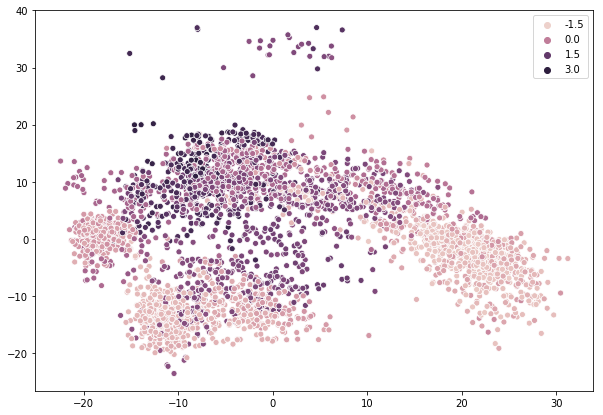

In [38]:
plt.figure(figsize=(10,7))
sns.scatterplot(X_train_r[:,0], X_train_r[:,1], hue=y_train_r)

In [27]:
sns.__version__

'0.9.0'